In [1]:
import pandas as pd
from pandas import DataFrame

Read in the scores file (sat-scores.csv). This time, you want the following columns: Year, State.Code, Total.Math, Family Income.Less than 20k.Math, Family Income.Between 20-40k.Math, Family Income.Between 40-60k.Math, Family Income.Between 60-80k.Math, Family Income.Between 80-100k.Math, and Family Income.More than 100k.Math.

pseduocode: 
- load the file using pandas, which selected columns as stated

In [2]:
filepath = r"C:\Users\dqthi\Downloads\pandas-workout-data\data\sat-scores.csv"
ex = pd.read_csv(filepath, usecols=['Year', 'State.Code', 'Total.Math', 'Family Income.Less than 20k.Math', 'Family Income.Between 20-40k.Math', 'Family Income.Between 40-60k.Math', 'Family Income.Between 60-80k.Math', 'Family Income.Between 80-100k.Math', 'Family Income.More than 100k.Math'])

In [3]:
ex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Year                                577 non-null    int64 
 1   State.Code                          577 non-null    object
 2   Total.Math                          577 non-null    int64 
 3   Family Income.Between 20-40k.Math   577 non-null    int64 
 4   Family Income.Between 40-60k.Math   577 non-null    int64 
 5   Family Income.Between 60-80k.Math   577 non-null    int64 
 6   Family Income.Between 80-100k.Math  577 non-null    int64 
 7   Family Income.Less than 20k.Math    577 non-null    int64 
 8   Family Income.More than 100k.Math   577 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 40.7+ KB



Rename the income-related column names to something shorter. I recommend income<20k, 20k<income<40k, 40k<income<60k, 60k<income<80k, 80k<income 100k, and income>100k.


pseducode: use rename function to change 

In [4]:
mapper = {'Family Income.Less than 20k.Math' : 'income<20k', 'Family Income.Between 20-40k.Math': '20k<income<40k', 'Family Income.Between 40-60k.Math' : '40k<income<60k', 'Family Income.Between 60-80k.Math' : '60k<income<80k', 'Family Income.Between 80-100k.Math' : '80k<income<100k', 'Family Income.More than 100k.Math': 'income>100k'} 

ex = ex.rename(columns=mapper)

Find the average SAT math score for each income level, grouped and then sorted by year.

In [5]:
ex.groupby('Year').mean(numeric_only=True).sort_index()

,Total.Math,20k<income<40k,40k<income<60k,60k<income<80k,80k<income<100k,income<20k,income>100k
Year,,,,,,,
2005,535.653846,488.653846,522.673077,536.076923,548.942308,427.596154,572.173077
2006,537.480769,502.923077,523.769231,534.903846,550.461538,461.019231,572.519231
2007,535.339623,494.849057,519.490566,533.188679,545.698113,457.924528,565.169811
2008,535.981132,523.622642,547.471698,549.188679,557.641509,478.641509,564.566038
2009,540.803922,527.823529,550.980392,553.941176,565.333333,482.058824,585.784314
2010,540.843137,499.274510,522.000000,534.235294,547.627451,477.039216,569.274510
2011,533.226415,494.886792,513.415094,528.660377,541.849057,460.452830,563.245283
2012,533.603774,492.056604,512.452830,525.773585,538.301887,458.773585,557.320755
2013,532.622642,490.132075,511.377358,520.320755,537.396226,469.358491,556.339623


In [6]:
ex.groupby('Year').mean().sort_index()

# when I remove .mean(numeric_only = True), the function include column "State.Code", which cannt be calculated the mean 


# ---------------------------------------------------------------------------
# TypeError                                 Traceback (most recent call last)
# File c:\Users\dqthi\anaconda3\envs\fresh_env\lib\site-packages\pandas\core\groupby\groupby.py:1942, in GroupBy._agg_py_fallback(self, how, values, ndim, alt)
#    1941 try:
# -> 1942     res_values = self._grouper.agg_series(ser, alt, preserve_dtype=True)
#    1943 except Exception as err:

# File c:\Users\dqthi\anaconda3\envs\fresh_env\lib\site-packages\pandas\core\groupby\ops.py:864, in BaseGrouper.agg_series(self, obj, func, preserve_dtype)
#     862     preserve_dtype = True
# --> 864 result = self._aggregate_series_pure_python(obj, func)
#     866 npvalues = lib.maybe_convert_objects(result, try_float=False)

# File c:\Users\dqthi\anaconda3\envs\fresh_env\lib\site-packages\pandas\core\groupby\ops.py:885, in BaseGrouper._aggregate_series_pure_python(self, obj, func)
#     884 for i, group in enumerate(splitter):
# --> 885     res = func(group)
#     886     res = extract_result(res)

# File c:\Users\dqthi\anaconda3\envs\fresh_env\lib\site-packages\pandas\core\groupby\groupby.py:2454, in GroupBy.mean.<locals>.<lambda>(x)
#    2451 else:
#    2452     result = self._cython_agg_general(
#    2453         "mean",
# -> 2454         alt=lambda x: Series(x, copy=False).mean(numeric_only=numeric_only),
#    2455         numeric_only=numeric_only,
#    2456     )
#    2457     return result.__finalize__(self.obj, method="groupby")
# ...
# -> 1946     raise type(err)(msg) from err
#    1948 if ser.dtype == object:
#    1949     res_values = res_values.astype(object, copy=False)

# TypeError: agg function failed [how->mean,dtype->object]

TypeError: agg function failed [how->mean,dtype->object]

For each year in the data set, determine how much better each income group did, on average, than the next-poorer group of students. Do you see (just by looking at the data) any income group that did worse, in any year, than the next-poorer students?


Which income bracket, on average, had the greatest advantage over the next-poorer income bracket?


Can we find, in a calculated and automated way, which income levels consistently (i.e., across all years) do worse than the next-poorest group?

In [8]:
ex.groupby('Year')[['income<20k',
            '20k<income<40k',
            '40k<income<60k',
            '60k<income<80k',
            '80k<income<100k',
            'income>100k']].mean().T

Year,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
income<20k,427.596154,461.019231,457.924528,478.641509,482.058824,477.039216,460.452830,458.773585,469.358491,459.415094,447.490566
20k<income<40k,488.653846,502.923077,494.849057,523.622642,527.823529,499.274510,494.886792,492.056604,490.132075,497.641509,491.603774
40k<income<60k,522.673077,523.769231,519.490566,547.471698,550.980392,522.000000,513.415094,512.452830,511.377358,514.943396,513.754717
60k<income<80k,536.076923,534.903846,533.188679,549.188679,553.941176,534.235294,528.660377,525.773585,520.320755,527.169811,527.132075
80k<income<100k,548.942308,550.461538,545.698113,557.641509,565.333333,547.627451,541.849057,538.301887,537.396226,543.132075,542.037736
income>100k,572.173077,572.519231,565.169811,564.566038,585.784314,569.274510,563.245283,557.320755,556.339623,555.433962,563.433962


In [10]:
(
    ex.groupby('Year')[['income<20k',
            '20k<income<40k',
            '40k<income<60k',
            '60k<income<80k',
            '80k<income<100k',
            'income>100k']]
            .mean()
            .T
            .pct_change()
)

Year,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
income<20k,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20k<income<40k,0.142793,0.090894,0.080635,0.093977,0.094936,0.046611,0.074783,0.072548,0.044260,0.083207,0.098579
40k<income<60k,0.069618,0.041450,0.049796,0.045546,0.043872,0.045517,0.037439,0.041451,0.043346,0.034768,0.045059
60k<income<80k,0.025645,0.021259,0.026368,0.003136,0.005374,0.023439,0.029694,0.025994,0.017489,0.023743,0.026038
80k<income<100k,0.023999,0.029085,0.023462,0.015391,0.020566,0.025068,0.024947,0.023828,0.032817,0.030279,0.028277
income>100k,0.042319,0.040071,0.035682,0.012418,0.036175,0.039529,0.039487,0.035331,0.035250,0.022650,0.039474


In [12]:
(
    ex
    .groupby('Year')
    [['income<20k',
      '20k<income<40k',
      '40k<income<60k',
      '60k<income<80k',
      '80k<income<100k',
      'income>100k']]
    .mean()
    .T
    .pct_change()
    .T
    .mean()
)

income<20k              NaN
20k<income<40k     0.083929
40k<income<60k     0.045260
60k<income<80k     0.020744
80k<income<100k    0.025247
income>100k        0.034399
dtype: float64

In [13]:
(
    ex
    .groupby('Year')
    [['income<20k',
      '20k<income<40k',
      '40k<income<60k',
      '60k<income<80k',
      '80k<income<100k',
      'income>100k']]
    .mean()
    .T
    .pct_change()
    .T
    .mean('columns')
)

Year
2005    0.060875
2006    0.044552
2007    0.043189
2008    0.034094
2009    0.040185
2010    0.036033
2011    0.041270
2012    0.039830
2013    0.034632
2014    0.038929
2015    0.047485
dtype: float64

In [14]:
(
    ex
    .groupby('Year')
    [['income<20k',
      '20k<income<40k',
      '40k<income<60k',
      '60k<income<80k',
      '80k<income<100k',
      'income>100k']]
    .mean()
    .T
    .pct_change()
    .T
    .mean()
    .sort_values(ascending=False)
    .head()
)

20k<income<40k     0.083929
40k<income<60k     0.045260
income>100k        0.034399
80k<income<100k    0.025247
60k<income<80k     0.020744
dtype: float64

In [15]:
change = (
    ex
    .groupby('Year')
    [['income<20k',
      '20k<income<40k',
      '40k<income<60k',
      '60k<income<80k',
      '80k<income<100k',
      'income>100k']]
    .mean()
    .T
    .pct_change()
)
change <= 0

Year,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
income<20k,False,False,False,False,False,False,False,False,False,False,False
20k<income<40k,False,False,False,False,False,False,False,False,False,False,False
40k<income<60k,False,False,False,False,False,False,False,False,False,False,False
60k<income<80k,False,False,False,False,False,False,False,False,False,False,False
80k<income<100k,False,False,False,False,False,False,False,False,False,False,False
income>100k,False,False,False,False,False,False,False,False,False,False,False


In [16]:
change[change <= 0]

Year,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
income<20k,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20k<income<40k,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40k<income<60k,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60k<income<80k,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80k<income<100k,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
income>100k,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
change[change <= 0].dropna()

Year,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015


Calculate descriptive statistics for all the changes in income brackets. Where do you see the largest difference between income brackets?

In [18]:
ex

,Year,State.Code,Total.Math,20k<income<40k,40k<income<60k,60k<income<80k,80k<income<100k,income<20k,income>100k
0,2005,AL,559,513,539,550,566,462,588
1,2005,AK,519,492,517,513,528,464,541
2,2005,AZ,530,498,520,524,534,485,554
3,2005,AR,552,513,543,553,570,489,572
4,2005,CA,522,477,506,521,535,451,566
...,...,...,...,...,...,...,...,...,...
572,2015,VA,517,469,488,496,514,441,549
573,2015,WA,511,483,503,521,534,449,560
574,2015,WV,500,468,483,487,503,448,522
575,2015,WI,606,551,596,590,605,573,615


In [19]:
change

Year,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
income<20k,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20k<income<40k,0.142793,0.090894,0.080635,0.093977,0.094936,0.046611,0.074783,0.072548,0.044260,0.083207,0.098579
40k<income<60k,0.069618,0.041450,0.049796,0.045546,0.043872,0.045517,0.037439,0.041451,0.043346,0.034768,0.045059
60k<income<80k,0.025645,0.021259,0.026368,0.003136,0.005374,0.023439,0.029694,0.025994,0.017489,0.023743,0.026038
80k<income<100k,0.023999,0.029085,0.023462,0.015391,0.020566,0.025068,0.024947,0.023828,0.032817,0.030279,0.028277
income>100k,0.042319,0.040071,0.035682,0.012418,0.036175,0.039529,0.039487,0.035331,0.035250,0.022650,0.039474


In [ ]:
change.describe() 

Year,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.060875,0.044552,0.043189,0.034094,0.040185,0.036033,0.041270,0.039830,0.034632,0.038929,0.047485
std,0.049326,0.027199,0.023315,0.037065,0.034000,0.011101,0.019630,0.019627,0.010796,0.025240,0.029621
min,0.023999,0.021259,0.023462,0.003136,0.005374,0.023439,0.024947,0.023828,0.017489,0.022650,0.026038
25%,0.025645,0.029085,0.026368,0.012418,0.020566,0.025068,0.029694,0.025994,0.032817,0.023743,0.028277
50%,0.042319,0.040071,0.035682,0.015391,0.036175,0.039529,0.037439,0.035331,0.035250,0.030279,0.039474
75%,0.069618,0.041450,0.049796,0.045546,0.043872,0.045517,0.039487,0.041451,0.043346,0.034768,0.045059
max,0.142793,0.090894,0.080635,0.093977,0.094936,0.046611,0.074783,0.072548,0.044260,0.083207,0.098579


In [22]:
import matplotlib

ModuleNotFoundError: No module named 'matplotlib'

In [23]:
!pip install matplotlib

   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------- ----------------------- 3.1/7.8 MB 14.2 MB/s eta 0:00:01
   --------------------------------- ------ 6.6/7.8 MB 15.5 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 14.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 11.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   -------------------------------- ------- 2.1/2.6 MB 11.7 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 9.8 MB/s eta 0:00:00


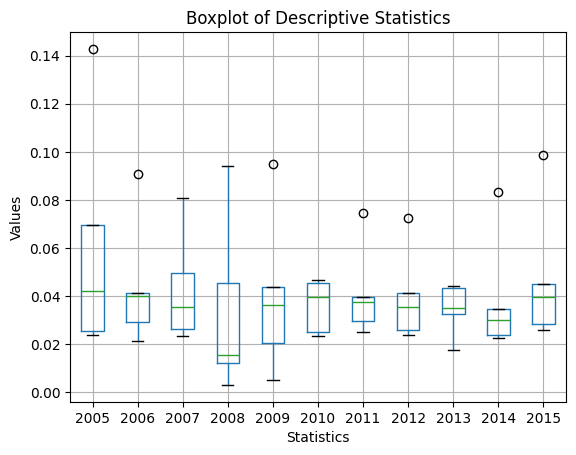

In [26]:
import matplotlib.pyplot as plt

# Generate descriptive statistics
# desc_stats = change.describe()

# Plot boxplot
change.boxplot()
plt.title('Boxplot of Descriptive Statistics')
plt.xlabel('Statistics')
plt.ylabel('Values')
plt.show()

In [27]:
change.describe()

Year,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.060875,0.044552,0.043189,0.034094,0.040185,0.036033,0.041270,0.039830,0.034632,0.038929,0.047485
std,0.049326,0.027199,0.023315,0.037065,0.034000,0.011101,0.019630,0.019627,0.010796,0.025240,0.029621
min,0.023999,0.021259,0.023462,0.003136,0.005374,0.023439,0.024947,0.023828,0.017489,0.022650,0.026038
25%,0.025645,0.029085,0.026368,0.012418,0.020566,0.025068,0.029694,0.025994,0.032817,0.023743,0.028277
50%,0.042319,0.040071,0.035682,0.015391,0.036175,0.039529,0.037439,0.035331,0.035250,0.030279,0.039474
75%,0.069618,0.041450,0.049796,0.045546,0.043872,0.045517,0.039487,0.041451,0.043346,0.034768,0.045059
max,0.142793,0.090894,0.080635,0.093977,0.094936,0.046611,0.074783,0.072548,0.044260,0.083207,0.098579


In [ ]:
# 2008 is the year that have the largest gap between income brackets as the gap between 50% of income brackets is 8% 

In [32]:
ex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             577 non-null    int64 
 1   State.Code       577 non-null    object
 2   Total.Math       577 non-null    int64 
 3   20k<income<40k   577 non-null    int64 
 4   40k<income<60k   577 non-null    int64 
 5   60k<income<80k   577 non-null    int64 
 6   80k<income<100k  577 non-null    int64 
 7   income<20k       577 non-null    int64 
 8   income>100k      577 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 40.7+ KB


In [35]:
ex.groupby('State.Code')['Total.Math'].mean().sort_values(ascending=False).head()

State.Code
IL    610.636364
IA    609.909091
MN    607.000000
ND    607.000000
WI    604.272727
Name: Total.Math, dtype: float64

In [36]:
ex['gap_richest_poorest'] = ex['income>100k'] - ex['income<20k']

In [38]:
ex.groupby('State.Code')['gap_richest_poorest'].mean().sort_values(ascending=False).head()

State.Code
ND    341.909091
WY    246.454545
DC    208.818182
SD    157.000000
MS    140.000000
Name: gap_richest_poorest, dtype: float64

In [39]:
# Filtering and transorming  

In [41]:
import numpy as np
np.random.seed(0)

df = DataFrame({'name': list('ABCDEFGHIJ'),
                'year': [2018, 2019, 2020] * 3 + [2021],
              'score':np.random.randint(80, 100, 10)})


In [42]:
df

,name,year,score
0,A,2018,92
1,B,2019,95
2,C,2020,80
3,D,2018,83
4,E,2019,83
5,F,2020,87
6,G,2018,89
7,H,2019,99
8,I,2020,98
9,J,2021,84


In [43]:
df['score'].mean()

89.0

In [44]:
df.loc[df['score'] > 90 ]

,name,year,score
0,A,2018,92
1,B,2019,95
7,H,2019,99
8,I,2020,98


In [45]:
df.groupby('year')['score'].mean()

year
2018    88.000000
2019    92.333333
2020    88.333333
2021    84.000000
Name: score, dtype: float64

In [46]:
def year_average_is_at_least_90(df):
    return df['score'].mean() > 90

df.groupby('year').filter(year_average_is_at_least_90)

,name,year,score
1,B,2019,95
4,E,2019,83
7,H,2019,99


In [47]:
df.groupby('year')['score'].transform(lambda x: x/100)

0    0.92
1    0.95
2    0.80
3    0.83
4    0.83
5    0.87
6    0.89
7    0.99
8    0.98
9    0.84
Name: score, dtype: float64

In [48]:
df['score'] = (
    df.groupby('year')['score']
    .transform(lambda x: x/100)
    )

In [49]:
df.groupby('year')['score'].transform(np.max)

C:\Users\dqthi\AppData\Local\Temp\ipykernel_15072\1727891656.py:1: FutureWarning: The provided callable <function max at 0x000001B313D9B1C0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df.groupby('year')['score'].transform(np.max)


0    0.92
1    0.99
2    0.98
3    0.92
4    0.99
5    0.98
6    0.92
7    0.99
8    0.98
9    0.84
Name: score, dtype: float64

In [50]:
df['score'] = df.groupby('year')['score'].transform(np.max)

C:\Users\dqthi\AppData\Local\Temp\ipykernel_15072\1600227049.py:1: FutureWarning: The provided callable <function max at 0x000001B313D9B1C0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df['score'] = df.groupby('year')['score'].transform(np.max)


In [51]:
df

,name,year,score
0,A,2018,0.92
1,B,2019,0.99
2,C,2020,0.98
3,D,2018,0.92
4,E,2019,0.99
5,F,2020,0.98
6,G,2018,0.92
7,H,2019,0.99
8,I,2020,0.98
9,J,2021,0.84
